In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# plt.style.use("dark_background")
from scipy.stats import trim_mean

In [69]:
playstorefile = "../Google apps store/datafile/googleplaystore.csv"
# reviewfile = "datafiles/DATA/Google Play Store Apps Dataset/googleplaystore_user_reviews.csv"

In [70]:
playstoredata = pd.read_csv(playstorefile)
# reviewdata = pd.read_csv(reviewfile)

In [71]:
pd.set_option("display.max_rows", 100)

## Module 1: Introduction into the dataset

In [72]:
playstoredata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [73]:
#the shape of the dataset
playstoredata.shape

(10841, 13)

In [74]:
#getting to know the data types of each columns before cleaning 
playstoredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [75]:
playstoredata["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

## Module 2: Data Cleaning and Preparation

In [76]:
# check for dupplicates
playstoredata[playstoredata.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


## Remove duplicates

In [77]:
playstoredata = playstoredata.drop_duplicates(subset="App")

In [78]:
playstoredata["App"].value_counts().sort_values(ascending=True).head()

Design innovation CD Cassette          1
theCut                                 1
Mom Doctor ER Emergency Family Game    1
Where's My Water?                      1
Strætó.is                              1
Name: App, dtype: int64

In [79]:
playstoredata.drop([10472, 9148], inplace = True)

## Cleaning the "Rating" column

In [80]:
playstoredata["Rating"].fillna(playstoredata["Rating"].median(), inplace = True)

In [81]:
# a function to return values greater than the normal rating to 5 on the ratings column
def num(num):
    if num > 5:
        return 5
    return num  

In [82]:
playstoredata["Rating"] = playstoredata["Rating"].apply(num)

In [83]:
playstoredata.sort_values(by = "Rating", ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6272,Propel BI APP,BUSINESS,5.0,3,23M,100+,Free,0,Everyone,Business,"July 24, 2018",1.39,4.4 and up
5795,Axe Champs! Wars,GAME,5.0,8,25M,50+,Free,0,Everyone,Arcade,"June 26, 2018",1.1,4.1 and up
8159,CZ Kompas,TOOLS,5.0,2,3.5M,10+,Free,0,Everyone,Tools,"July 9, 2018",1.1,4.0 and up
5966,BC MVA Fines,BOOKS_AND_REFERENCE,5.0,5,7.2M,50+,Paid,$1.75,Everyone,Books & Reference,"October 8, 2015",1.0,4.1 and up
5917,Ra Ga Ba,GAME,5.0,2,20M,1+,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21M,"1,000+",Free,0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up
7926,Tech CU Card Manager,FINANCE,1.0,2,7.2M,"1,000+",Free,0,Everyone,Finance,"July 25, 2017",1.0.1,4.0 and up


## cleaning the "Reviews" columns

In [84]:
playstoredata["Reviews"] = playstoredata["Reviews"].astype(int)

In [85]:
playstoredata["Size"].value_counts()

Varies with device    1226
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
920k                     1
862k                     1
861k                     1
208k                     1
892k                     1
Name: Size, Length: 461, dtype: int64

## cleaning the "Size" column and also formating the various storage size

In [86]:
playstoredata["Size"] =  playstoredata.Size.str.replace("M", "000")
playstoredata["Size"] =  playstoredata.Size.str.replace("k", "").str.strip()

In [87]:
playstoredata["Size"].replace("Varies with device", np.nan, inplace = True)

In [88]:
playstoredata["Size"] = playstoredata["Size"].astype(float)

## cleaning the "Installs" column

In [89]:
# remove the "+" and the "," sign so as to be able to change the dtype to an int
#

playstoredata["Installs"] = playstoredata["Installs"].str.replace("+", "")
playstoredata["Installs"] = playstoredata["Installs"].str.replace(",", "").str.strip()

<ipython-input-89-9f7bc9befa9b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  playstoredata["Installs"] = playstoredata["Installs"].str.replace("+", "")


In [90]:
playstoredata["Installs"] = playstoredata["Installs"].astype(int)

# Cleaning the "Price" column

In [91]:
playstoredata["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [92]:
playstoredata["Price"] = playstoredata["Price"].str.replace("$", "")
#strip it of any leading or trailing whitespace
playstoredata["Price"].str.strip()
playstoredata["Price"] = playstoredata["Price"].astype(float) #change the data type to float

<ipython-input-92-a0c97680dccc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  playstoredata["Price"] = playstoredata["Price"].str.replace("$", "")


In [93]:
playstoredata["Price"].sort_values(ascending = False)

4367     400.00
5373     399.99
5358     399.99
9934     399.99
5362     399.99
          ...  
4078       0.00
4079       0.00
4080       0.00
4081       0.00
10840      0.00
Name: Price, Length: 9658, dtype: float64

# cleaning the "Last Upated" datetime column

In [94]:
playstoredata["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 9658, dtype: object

In [95]:
#converting it to a datetime datatype
playstoredata["Last Updated"] = pd.to_datetime(playstoredata["Last Updated"])

In [96]:
playstoredata["Last Updated"].dt.month_name()

0        January
1        January
2         August
3           June
4           June
          ...   
10836       July
10837       July
10838    January
10839    January
10840       July
Name: Last Updated, Length: 9658, dtype: object

### Number of Years 

In [97]:
# The number of years last updated
playstoredata["Last Updated"].dt.year.nunique()

9

# Module 3: Exploratory Data Analysis(EDA) & Visualization

In [98]:
playstoredata.sample(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
4833,Z City,FAMILY,4.3,3976,98000.0,100000,Free,0.00,Teen,Strategy,2018-01-29,1.1.6,4.0 and up
6417,BL 女性向け恋愛ゲーム◆ごくメン,FAMILY,4.2,1901,8.2,100000,Free,0.00,Mature 17+,Simulation,2016-07-07,1.3.0,2.3.3 and up
6084,Hard Time (Prison Sim),GAME,4.3,275843,41000.0,10000000,Free,0.00,Teen,Adventure,2018-07-19,1.401,4.0 and up
6430,BL Carrier,BUSINESS,4.3,0,11000.0,10,Free,0.00,Everyone,Business,2018-07-27,5.0,4.0.3 and up
9829,Economic Times : Market News Go Edition,NEWS_AND_MAGAZINES,4.3,39,4.2,5000,Free,0.00,Everyone,News & Magazines,2018-04-18,1.0.4,4.1 and up
6119,Random Love (BF),FAMILY,3.7,3,10000.0,50,Free,0.00,Everyone,Entertainment,2015-10-04,1.0.0,2.2 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58000.0,500000,Free,0.00,Everyone,Communication,2018-08-02,4.2.1,4.2 and up
9816,File Manager by Xiaomi: release file storage s...,TOOLS,4.8,337532,15000.0,10000000,Free,0.00,Everyone,Tools,2018-07-11,V1-180703,4.4 and up
10566,FK Crvena Zvezda Izzy,TOOLS,4.8,1456,15000.0,50000,Free,0.00,Everyone,Tools,2016-11-14,1.2,4.4 and up


## Apps installations by Category

In [99]:
playstoredata["Category"].nunique()

33

In [100]:
avg_installs_by_category = playstoredata[["App", "Installs"]].groupby(playstoredata["Category"]).mean().round()
avg_installs_by_category.reset_index(inplace = True)

In [101]:
avg_installs_by_category.sort_values(by = "Installs", ascending = False, inplace = True)

# Line plot of average apps installs by category

<AxesSubplot:title={'center':'Line Plot showing Apps Average Installs by Category'}, xlabel='Category', ylabel='Installs'>

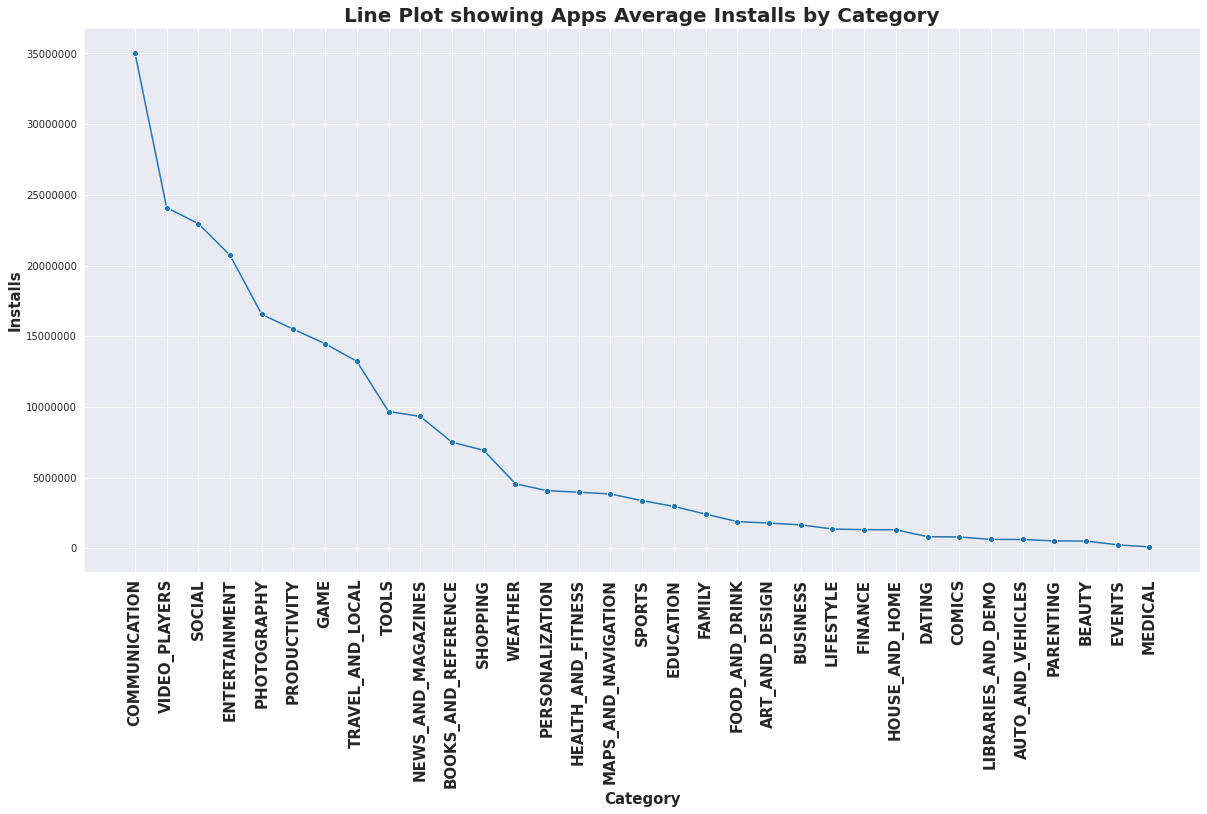

In [45]:
plt.figure(figsize=(20, 10))
plt.title("Line Plot showing Apps Average Installs by Category", fontsize = 20, weight = "bold")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90, fontsize = 15, weight = "bold")
plt.xlabel("Category", fontsize = 15, weight = "bold")
plt.ylabel("Installs", fontsize = 15, weight = "bold")
sns.lineplot(x = "Category", y = "Installs", marker = "o", data = avg_installs_by_category)

<AxesSubplot:title={'center':'Bar plot showing average apps installs by category'}, xlabel='Category', ylabel='Installs'>

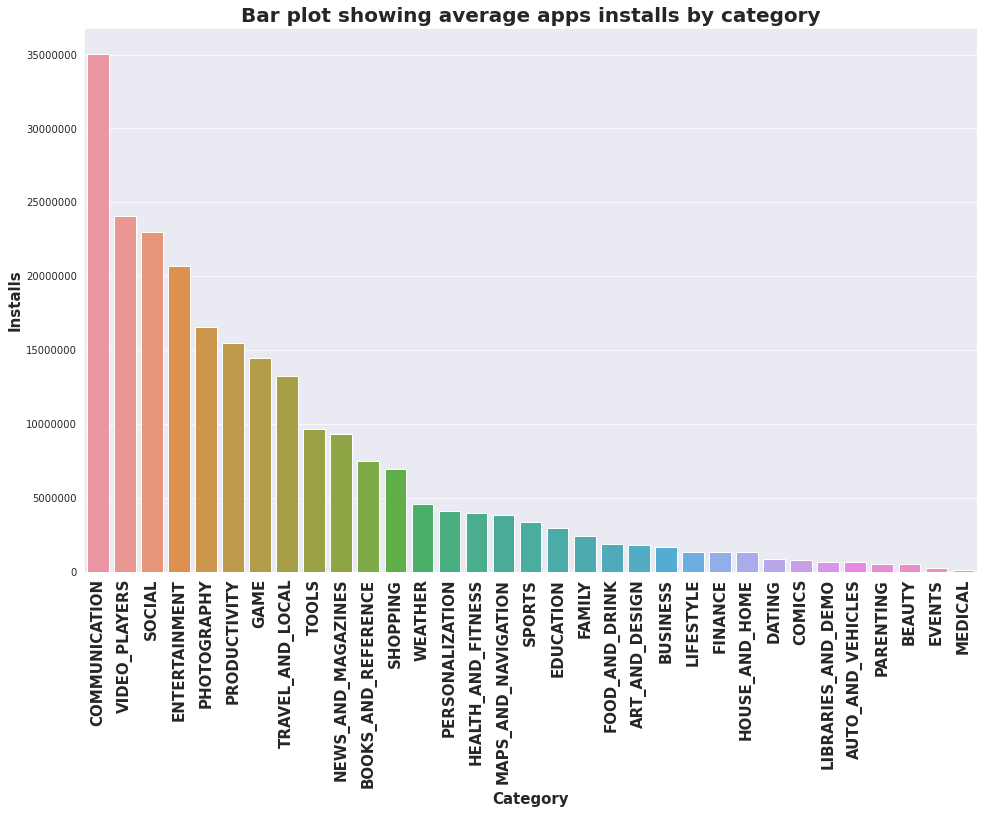

In [46]:
plt.figure(figsize = (16, 10))
plt.title("Bar plot showing average apps installs by category", fontsize = 20, weight = "bold")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 90, fontsize = 15, weight = "bold")
plt.xlabel("Category", fontsize = 15, weight = "bold")
plt.ylabel("Installs", fontsize = 15, weight = "bold")
sns.barplot(x = "Category", y = "Installs", data = avg_installs_by_category)

In [47]:
sum_by_category = playstoredata[["App", "Installs"]].groupby(playstoredata["Category"]).sum()
sum_by_category.reset_index(inplace = True)

In [48]:
sum_by_category.sort_values(by = "Installs",ascending = False, inplace= True)

In [49]:
# sum_by_category.sort_values(by = "Installs", ascending = False).head(20)

<AxesSubplot:title={'center':'Bar Plot showing the sum of Apps Installs by category'}, xlabel='Category', ylabel='Installs'>

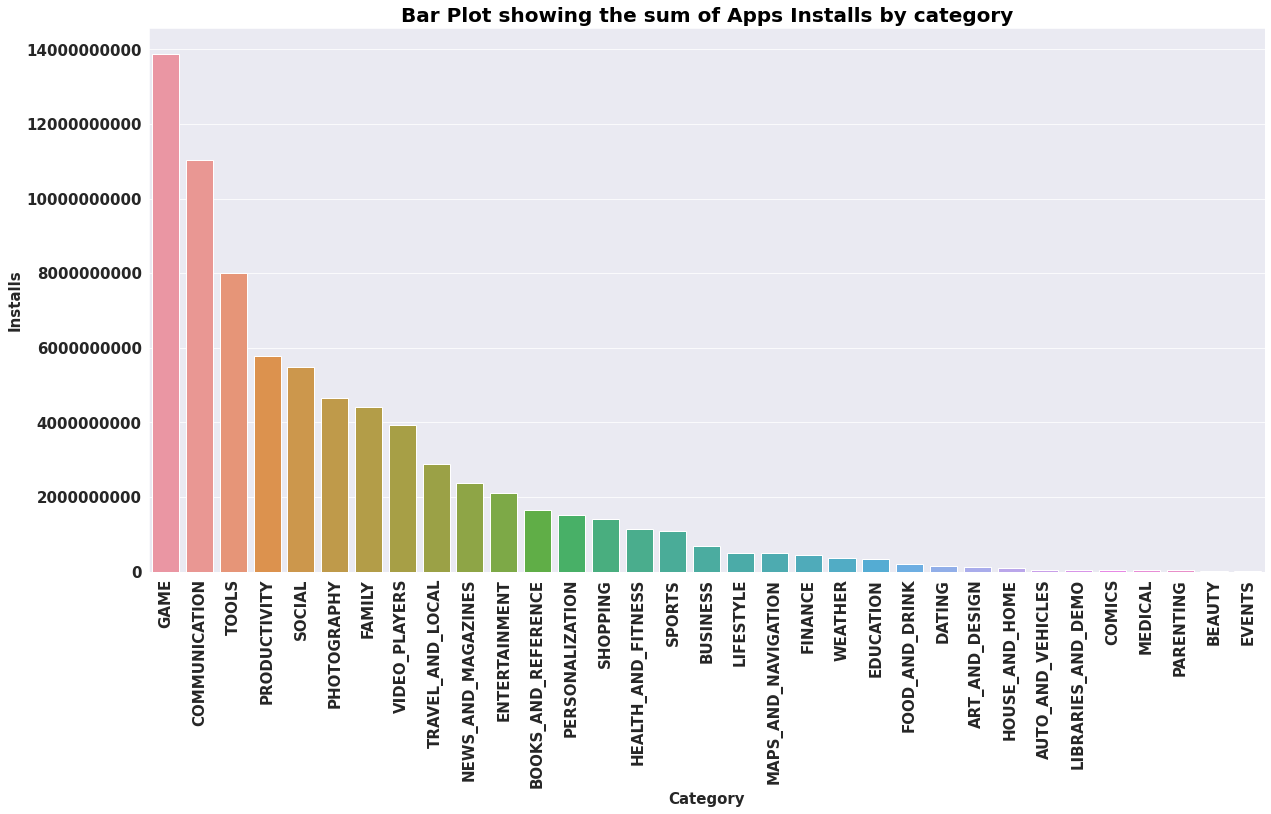

In [50]:
plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Bar Plot showing the sum of Apps Installs by category", fontsize = 20, weight = "bold", color = "black")
plt.ticklabel_format(style = "plain", axis= "y")
plt.xticks(rotation = 90, fontsize = 15, weight = "bold")
plt.yticks(fontsize = 15, weight = "bold")
plt.xlabel("Category", fontsize = 15, weight = "bold")
plt.ylabel("Installs", fontsize = 15, weight = "bold")
sns.barplot(x = "Category", y = "Installs", data = sum_by_category)

## Average App Installs per year

In [51]:
avg_yearly_installs = playstoredata[["Category", "Installs"]].groupby(playstoredata["Last Updated"].dt.year).mean().round().reset_index()

In [52]:
avg_yearly_installs

,Last Updated,Installs
0,2010,100000.0
1,2011,1160473.0
2,2012,538162.0
3,2013,954503.0
4,2014,1328991.0
5,2015,902761.0
6,2016,1659006.0
7,2017,1612654.0
8,2018,11161509.0


<AxesSubplot:title={'center':'Line plot showing Average Apps Installs per Year'}, xlabel='Last Updated', ylabel='Installs'>

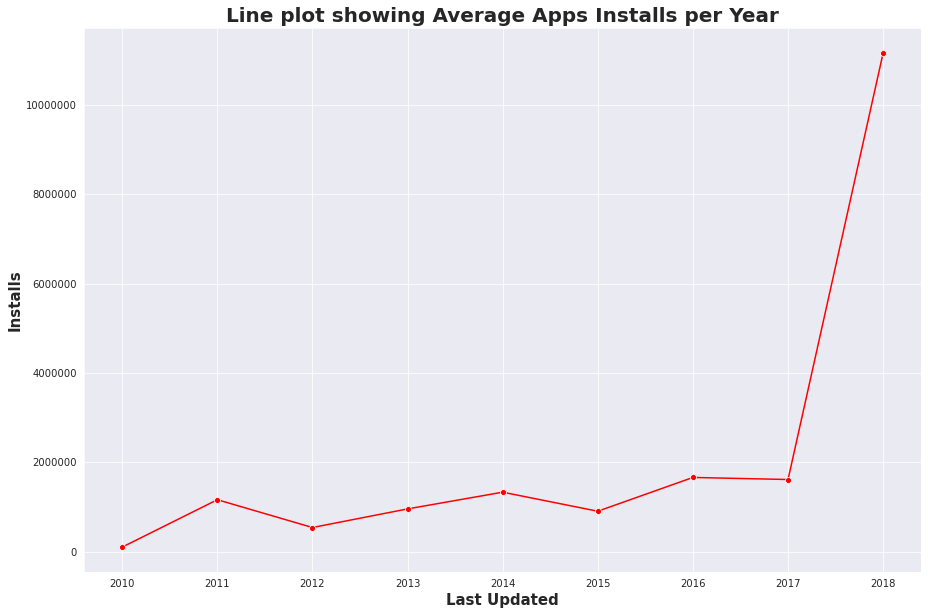

In [53]:
plt.figure(figsize= (15, 10))
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Line plot showing Average Apps Installs per Year", weight = "bold", fontsize = 20)
plt.xlabel("Last Updated", fontsize = 15, weight = "bold")
plt.ylabel("Installs", fontsize = 15, weight = "bold")
sns.lineplot(x = "Last Updated", y = "Installs", color = "Red", marker = "o", data= avg_yearly_installs)

<AxesSubplot:title={'center':'Bar Plot showing Avg Number of Installs per year'}, xlabel='Last Updated', ylabel='Installs'>

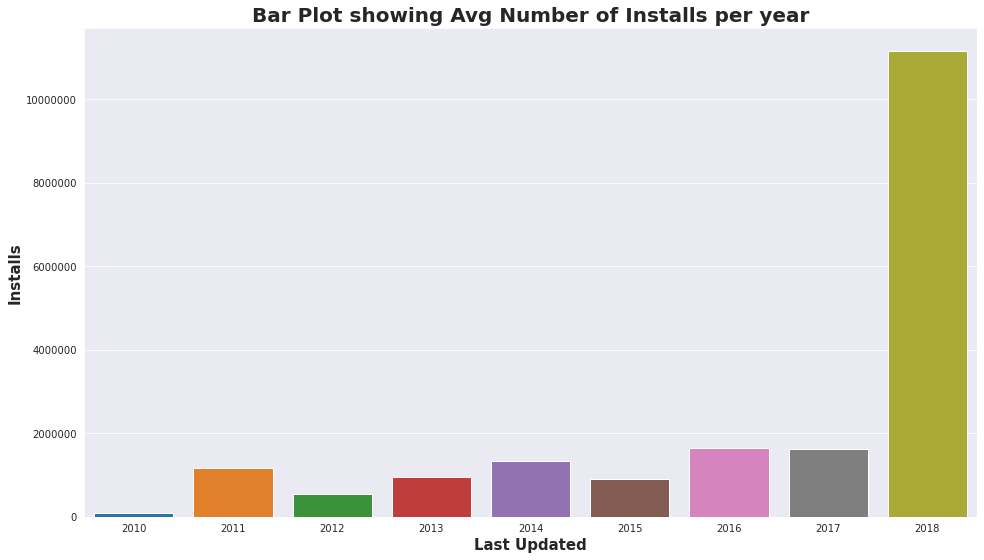

In [54]:
plt.figure(figsize = (16, 9))
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Bar Plot showing Avg Number of Installs per year", fontsize = 20, weight = "bold")
plt.xlabel("Last Updated", fontsize = 15, weight = "bold")
plt.ylabel("Installs", fontsize = 15, weight = "bold")
sns.barplot(x = "Last Updated", y = "Installs", data = avg_yearly_installs)

## Average Number of Installs per month

In [55]:
avg_monthly_installs = playstoredata[["Category", "Installs"]].groupby(playstoredata["Last Updated"].dt.month_name()).mean().round().reset_index()
avg_monthly_installs.sort_values(by = "Installs", ascending= False)

,Last Updated,Installs
1,August,24148684.0
5,July,10966769.0
6,June,4152566.0
8,May,3934097.0
0,April,2531348.0
2,December,2492907.0
9,November,2472744.0
4,January,2198909.0
3,February,1488107.0
7,March,1396981.0


<AxesSubplot:title={'center':'Average Apps Installs per Month'}, xlabel='Last Updated', ylabel='Installs'>

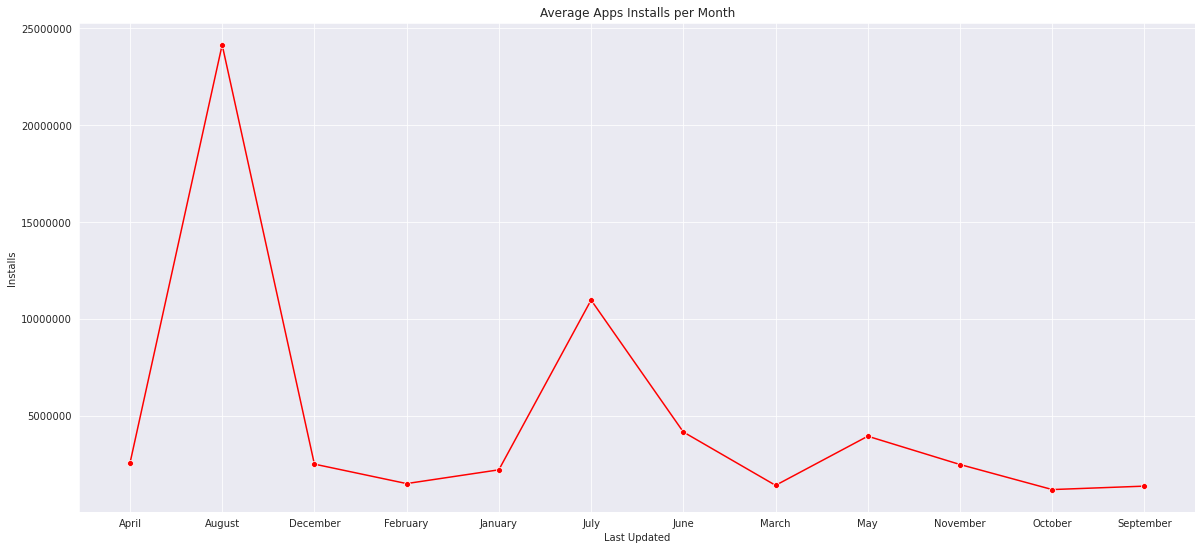

In [56]:
plt.figure(figsize= (20, 9))
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Average Apps Installs per Month")
sns.lineplot(x = "Last Updated", y = "Installs", color = "red", marker= "o", data= avg_monthly_installs)

<AxesSubplot:title={'center':'Bar Plot Showing App Monthly Installs'}, xlabel='Last Updated', ylabel='Installs'>

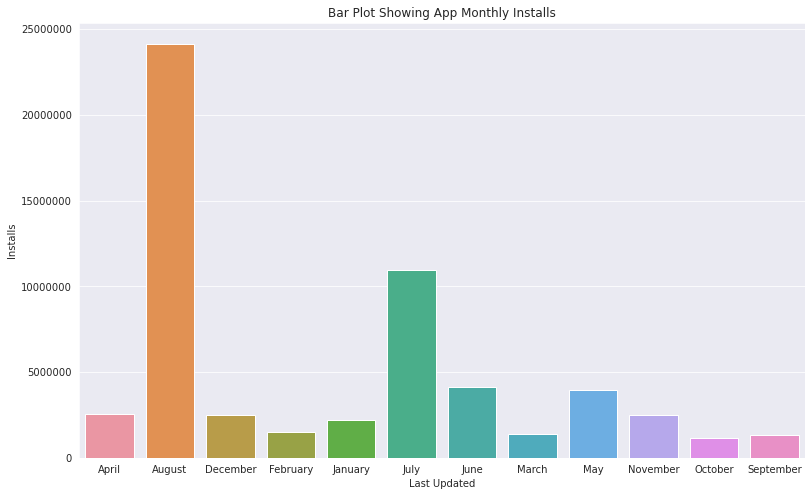

In [57]:
plt.figure(figsize= (13, 8))
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Bar Plot Showing App Monthly Installs")
sns.barplot(x = "Last Updated", y = "Installs", data = avg_monthly_installs)

<AxesSubplot:title={'center':'Bar Plot Showing App Monthly Installs'}, xlabel='Last Updated', ylabel='Installs'>

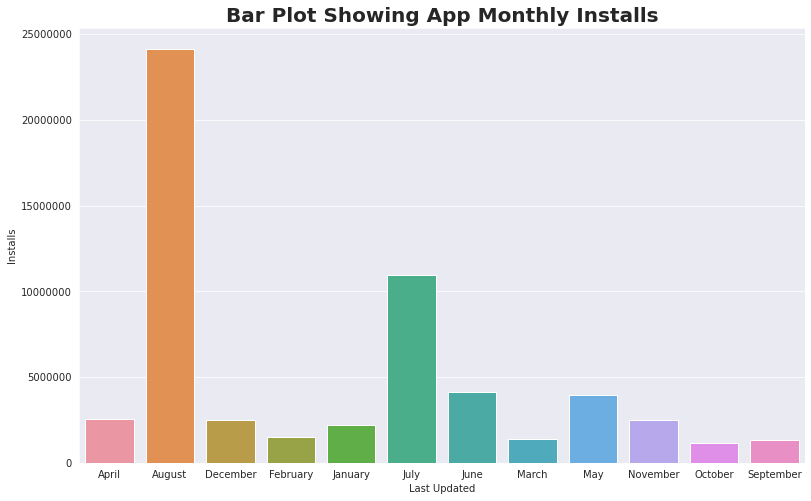

In [58]:
plt.figure(figsize= (13, 8))
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Bar Plot Showing App Monthly Installs", weight = "bold", fontsize = 20)
sns.barplot(x = "Last Updated", y = "Installs", data = avg_monthly_installs)

In [59]:
# sns.set_style("darkgrid")
# sns.relplot(x = "Rating", y = "Installs", col = "Category", col_wrap = 3, data = playstoredata)

# Apps Rating and Installs

In [60]:
apps_rating = playstoredata[["App", "Category", "Installs", "Reviews", "Rating"]].groupby(by = "Category").sum()
apps_rating.reset_index(inplace = True)

In [61]:
# apps_rating[apps_rating["Rating"] == apps_rating["Rating"].min()]

In [62]:
apps_rating.sort_values(by = "Rating", ascending= False, inplace = True)

Text(0.5, 1.0, 'Sum of Apps Rating by Category')

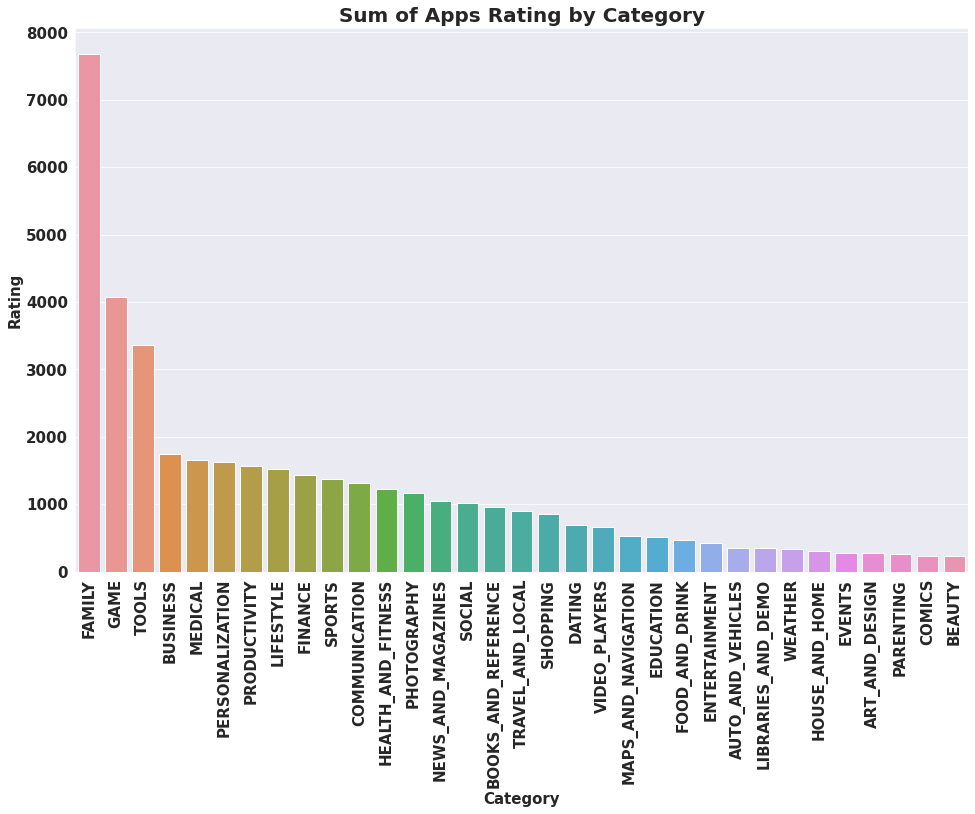

In [63]:
plt.figure(figsize= (16, 10))
plt.ticklabel_format(style = "plain", axis= "y")
plt.xticks(rotation = 90, fontsize = 15, weight = "bold")
plt.yticks(fontsize = 15, weight = "bold")
plt.xlabel("Category", fontsize = 15, weight = "bold")
plt.ylabel("Rating", fontsize = 15, weight = "bold")
sns.barplot(x = "Category", y = "Rating", data= apps_rating)
plt.title("Sum of Apps Rating by Category", fontsize = 20, weight = "bold")

In [64]:
max_apps = playstoredata[playstoredata["Installs"] == playstoredata["Installs"].max() ]

In [65]:
max_apps["App"].value_counts()

Instagram                                   1
Google Chrome: Fast & Secure                1
Skype - free IM & video calls               1
Google Drive                                1
Gmail                                       1
Subway Surfers                              1
Maps - Navigate & Explore                   1
Google Street View                          1
WhatsApp Messenger                          1
Messenger – Text and Video Chat for Free    1
Hangouts                                    1
Google Play Games                           1
Facebook                                    1
Google                                      1
Google News                                 1
Google Play Movies & TV                     1
Google+                                     1
YouTube                                     1
Google Play Books                           1
Google Photos                               1
Name: App, dtype: int64

In [66]:
max_apps["Category"].value_counts()

COMMUNICATION          6
SOCIAL                 3
TRAVEL_AND_LOCAL       2
VIDEO_PLAYERS          2
BOOKS_AND_REFERENCE    1
PRODUCTIVITY           1
GAME                   1
PHOTOGRAPHY            1
NEWS_AND_MAGAZINES     1
ENTERTAINMENT          1
TOOLS                  1
Name: Category, dtype: int64

In [67]:
max_apps[max_apps["Category"] == "SOCIAL"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,NaN,1000000000,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device
